In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
import os
import terra
import meerkat as mk
from domino.data.visual_genome import read_vg, ATTRIBUTE_GROUPS
import numpy as np
import pandas as pd
from rich import print
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(1,'/pd/maya/domino/domino')

In [129]:
from domino.evaluate import run_sdms, run_sdm, score_sdm_explanations, score_sdms
import meerkat.contrib.mimic.gcs

from plot import PALETTE, coherence_metric, EMB_PALETTE, generate_group_df

### Plots: Section 5.2 - Embeddings

In [106]:
df_synthetic_corr = generate_group_df(40598, 45159, "correlation")
df_synthetic_corr_convirt = generate_group_df(78436, 79801, "correlation")
df_synthetic_rare = generate_group_df(57203, 58676, "rare")
df_synthetic_rare_convirt = generate_group_df(77417, 77753, "rare")
df_synthetic_nl = generate_group_df(63176, 64524, "noisy_label")
df_synthetic_nl_convirt = generate_group_df(77038, 77296, "noisy_label")

df = pd.concat([df_synthetic_corr, df_synthetic_corr_convirt, df_synthetic_rare, df_synthetic_rare_convirt, df_synthetic_nl, df_synthetic_nl_convirt])
df = df[df['emb_type'] != 'mimic_imageonly']
df = df[df['emb_type'] != 'mimic_multimodal_class']
df.head()

/pd/maya/domino/domino/plot.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(slice_type=="correlation"): grouped_df = grouped_df[grouped_df['alpha'] != 0.0]
/pd/maya/domino/domino/plot.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return(grouped_df)
/pd/maya/domino/domino/plot.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,...,target_name,slice_name,index,config/sdm,alpha,sdm_class,emb_type,success,slice_type,score_model_run_id
5311,41210,1,0,0.830594,0.6,0.56,0.52,0.038674,0.071823,0.151934,...,atelectasis,atelectasis=0_cardio_group=1,5311,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,bit,False,correlation,NaN
5373,41216,3,0,0.836570,0.9,0.80,0.59,0.052486,0.081492,0.140884,...,atelectasis,atelectasis=0_cardio_group=1,5373,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,clip,False,correlation,NaN
5254,41204,4,0,0.786897,0.6,0.48,0.43,0.034530,0.059392,0.124309,...,atelectasis,atelectasis=0_cardio_group=1,5254,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,imagenet,False,correlation,NaN
5333,41212,3,0,0.797306,1.0,0.84,0.74,0.053867,0.102210,0.171271,...,atelectasis,atelectasis=0_cardio_group=1,5333,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.2,domino.sdm.gmm.MixtureModelSDM,mimic_multimodal,False,correlation,NaN
5460,41225,0,0,0.800520,0.7,0.60,0.56,0.058116,0.112224,0.186373,...,atelectasis,atelectasis=0_cardio_group=1,5460,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.4,domino.sdm.gmm.MixtureModelSDM,bit,False,correlation,NaN


(0.0, 1.0)

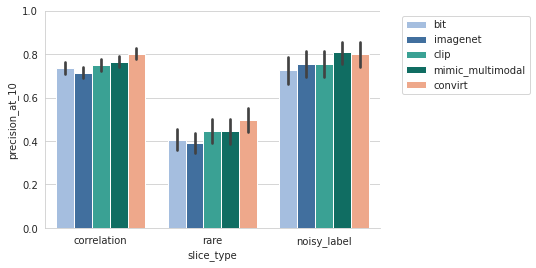

In [109]:
sns.barplot(
    data=df[df["sdm_class"] == "domino.sdm.gmm.MixtureModelSDM"],
    y="precision_at_10",
    x="slice_type",
    hue="emb_type",
    hue_order=EMB_PALETTE.keys(),
    palette=sns.color_palette(EMB_PALETTE.values(), 5)
)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim([0,1])
#plt.savefig("figures/08-01_bar.pdf")

In [123]:
df_synthetic_rare = generate_group_df(58849, 60240, "rare")
df_synthetic_rare_new = generate_group_df(82396, 83004, "rare")

df = pd.concat([df_synthetic_rare, df_synthetic_rare_new])
df = df[df['emb_type'] != 'mimic_imageonly']
df = df[df['emb_type'] != 'mimic_multimodal_class']
df.head()

/pd/maya/domino/domino/plot.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(slice_type=="correlation"): grouped_df = grouped_df[grouped_df['alpha'] != 0.0]
/pd/maya/domino/domino/plot.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return(grouped_df)
/pd/maya/domino/domino/plot.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,...,target_name,score_model_run_id,slice_name,index,config/sdm,alpha,sdm_class,emb_type,success,slice_type
3038,59489,3,0,0.767429,0.1,0.04,0.01,0.025641,0.025641,0.051282,...,lung_group,58750,atelectasis,3038,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,bit,False,rare
3013,59483,3,0,0.636380,0.1,0.04,0.04,0.025641,0.102564,0.153846,...,lung_group,58750,atelectasis,3013,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,clip,False,rare
3002,59482,2,0,0.566687,0.1,0.08,0.03,0.076923,0.076923,0.076923,...,lung_group,58750,atelectasis,3002,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,imagenet,False,rare
3015,59485,0,0,0.519065,0.0,0.00,0.01,0.000000,0.025641,0.025641,...,lung_group,58750,atelectasis,3015,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,mimic_multimodal,False,rare
3186,59520,1,0,0.753583,0.2,0.08,0.03,0.025000,0.037500,0.062500,...,lung_group,58759,atelectasis,3186,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.032,domino.sdm.gmm.MixtureModelSDM,bit,False,rare


(0.0, 1.0)

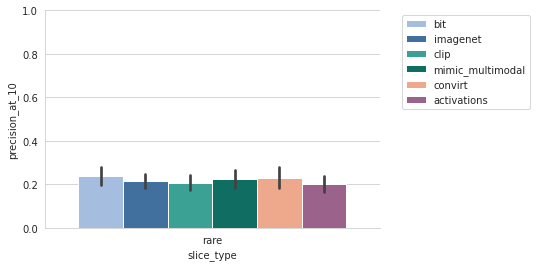

In [130]:
sns.barplot(
    data=df[df["sdm_class"] == "domino.sdm.gmm.MixtureModelSDM"],
    y="precision_at_10",
    x="slice_type",
    hue="emb_type",
    hue_order=EMB_PALETTE.keys(),
    palette=sns.color_palette(EMB_PALETTE.values(), 6)
)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.ylim([0,1])
#plt.savefig("figures/08-01_bar.pdf")

In [121]:
    setting_dp = run_sdms.out(82396).load()
    slice_df = score_sdms.out(83004).load() 
    slice_df = pd.DataFrame(slice_df)
    score_dp = mk.DataPanel.from_pandas(slice_df)
    results_dp = mk.merge(
        score_dp,
        setting_dp["config/sdm", "alpha","run_sdm_run_id", "sdm_class"],
        on="run_sdm_run_id"
    )
    emb_col = results_dp["config/sdm"].map(lambda x: x["sdm_config"]["emb"][0] if x["sdm_config"]["emb"][0] != None else "activations")
    results_dp["emb_type"] = emb_col

    results_df = results_dp.to_pandas()
    results_df

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,recall,precision,target_name,score_model_run_id,slice_name,index,config/sdm,alpha,sdm_class,emb_type
0,82409,0,0,0.540948,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,lung_group,58683,lung_opacity,0,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,domino.sdm.gmm.MixtureModelSDM,convirt
1,82409,1,0,0.591984,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,lung_group,58683,lung_opacity,1,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,domino.sdm.gmm.MixtureModelSDM,convirt
2,82409,2,0,0.617019,0.1,0.04,0.02,0.083333,0.083333,0.083333,0.958333,0.004420,lung_group,58683,lung_opacity,2,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,domino.sdm.gmm.MixtureModelSDM,convirt
3,82409,3,0,0.547499,0.0,0.00,0.01,0.000000,0.041667,0.041667,0.041667,0.008850,lung_group,58683,lung_opacity,3,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,domino.sdm.gmm.MixtureModelSDM,convirt
4,82409,4,0,0.507735,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,lung_group,58683,lung_opacity,4,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.01,domino.sdm.gmm.MixtureModelSDM,convirt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,82999,0,0,0.500000,0.1,0.04,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,cardio_group,58842,cardiomegaly,2195,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,domino.sdm.gmm.MixtureModelSDM,activations
2196,82999,1,0,0.500000,0.1,0.04,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,cardio_group,58842,cardiomegaly,2196,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,domino.sdm.gmm.MixtureModelSDM,activations
2197,82999,2,0,0.861104,0.0,0.00,0.04,0.013699,0.027397,0.061644,0.020548,0.028846,cardio_group,58842,cardiomegaly,2197,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,domino.sdm.gmm.MixtureModelSDM,activations
2198,82999,3,0,0.122768,0.0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,cardio_group,58842,cardiomegaly,2198,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.10,domino.sdm.gmm.MixtureModelSDM,activations


In [128]:
df_synthetic_rare_new

,run_sdm_run_id,pred_slice_idx,slice_idx,auroc,precision_at_10,precision_at_25,precision_at_100,recall_at_50,recall_at_100,recall_at_200,...,target_name,score_model_run_id,slice_name,index,config/sdm,alpha,sdm_class,emb_type,success,slice_type
1038,82644,3,0,0.779511,0.1,0.04,0.01,0.025641,0.025641,0.025641,...,lung_group,58750,atelectasis,1038,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,activations,False,rare
1000,82630,0,0,0.674935,0.0,0.00,0.00,0.000000,0.000000,0.025641,...,lung_group,58750,atelectasis,1000,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.010,domino.sdm.gmm.MixtureModelSDM,convirt,False,rare
1076,82664,1,0,0.760133,0.2,0.12,0.04,0.050000,0.050000,0.087500,...,lung_group,58759,atelectasis,1076,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.032,domino.sdm.gmm.MixtureModelSDM,activations,False,rare
1041,82643,1,0,0.584403,0.1,0.08,0.03,0.025000,0.037500,0.100000,...,lung_group,58759,atelectasis,1041,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.032,domino.sdm.gmm.MixtureModelSDM,convirt,False,rare
1089,82666,4,0,0.574925,0.1,0.08,0.05,0.010989,0.027473,0.043956,...,lung_group,58760,atelectasis,1089,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.055,domino.sdm.gmm.MixtureModelSDM,activations,False,rare
1094,82668,4,0,0.767551,0.1,0.12,0.11,0.027473,0.060440,0.098901,...,lung_group,58760,atelectasis,1094,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.055,domino.sdm.gmm.MixtureModelSDM,convirt,False,rare
1126,82674,1,0,0.550454,0.2,0.12,0.05,0.016667,0.020833,0.045833,...,lung_group,58768,atelectasis,1126,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.078,domino.sdm.gmm.MixtureModelSDM,activations,False,rare
1122,82673,2,0,0.495364,0.1,0.04,0.05,0.012500,0.020833,0.062500,...,lung_group,58768,atelectasis,1122,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.078,domino.sdm.gmm.MixtureModelSDM,convirt,False,rare
1169,82694,4,0,0.664617,0.1,0.16,0.17,0.026144,0.055556,0.091503,...,lung_group,58767,atelectasis,1169,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.100,domino.sdm.gmm.MixtureModelSDM,activations,False,rare
1161,82695,1,0,0.513199,0.1,0.08,0.07,0.016340,0.022876,0.039216,...,lung_group,58767,atelectasis,1161,{'sdm_class': '<class 'domino.sdm.gmm.MixtureM...,0.100,domino.sdm.gmm.MixtureModelSDM,convirt,False,rare
